In [144]:
import os
import pandas as pd
%matplotlib inline

In [145]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [146]:
# Read your api key environment variable

# Import newsapi library and env 
from newsapi import NewsApiClient
from dotenv import load_dotenv
load_dotenv()

api_key = os.getenv("news_api")
type (api_key)

str

In [147]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [148]:
# Fetch the Bitcoin news articles
bitcoin_news = newsapi.get_everything(
    q="Bitcoin AND bitcoin",
    language="en"
)
# Show the total number of news
bitcoin_news["totalResults"]

3484

In [149]:
# Fetch the Ethereum news articles
ethereum_news = newsapi.get_everything(
    q="Ethereum AND ethereum",
    language="en"
)
# Show the total number of news
ethereum_news["totalResults"]

925

In [150]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_news["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["compound", "positive", "negative", "neutral", "text"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,compound,positive,negative,neutral,text
0,0.0000,0.000,0.000,1.000,The Winklevoss twinsthe brothers Mark Zuckerbe...
1,-0.3464,0.046,0.134,0.819,If youre planning to do some protesting and yo...
2,-0.2755,0.000,0.070,0.930,Reuters\r\n<ul><li>Goldman Sachs gave five rea...
3,0.0000,0.000,0.000,1.000,<ul><li>Famed investor Michael Novogratz tweet...
4,0.5070,0.090,0.000,0.910,Our robot colleague Satoshi Nakaboto writes ab...


In [151]:
# this will hold just the text
bitcoin_text = bitcoin_df.loc[:,'text']
bitcoin_text.head()

0    The Winklevoss twinsthe brothers Mark Zuckerbe...
1    If youre planning to do some protesting and yo...
2    Reuters\r\n<ul><li>Goldman Sachs gave five rea...
3    <ul><li>Famed investor Michael Novogratz tweet...
4    Our robot colleague Satoshi Nakaboto writes ab...
Name: text, dtype: object

In [152]:
# Create the ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_news["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["compound", "positive", "negative", "neutral", "text"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,compound,positive,negative,neutral,text
0,0.5070,0.090,0.000,0.910,Our robot colleague Satoshi Nakaboto writes ab...
1,0.0000,0.000,0.000,1.000,Editors note:Andreessen Horowitzs Crypto Start...
2,0.0000,0.000,0.000,1.000,For developers looking to quickly build identi...
3,0.0000,0.000,0.000,1.000,"Akron, Ohio, the hometown of LeBron James and ..."
4,-0.4457,0.031,0.086,0.882,"Some open-source groups, such as The Linux Fou..."


In [153]:
# this will hold just the text
ethereum_text = ethereum_df.loc[:,'text']
ethereum_text.head()

0    Our robot colleague Satoshi Nakaboto writes ab...
1    Editors note:Andreessen Horowitzs Crypto Start...
2    For developers looking to quickly build identi...
3    Akron, Ohio, the hometown of LeBron James and ...
4    Some open-source groups, such as The Linux Fou...
Name: text, dtype: object

In [154]:
# Describe the Bitcoin Sentimen
bitcoin_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.310145,0.067400,0.014100,0.918400
std,0.319985,0.037293,0.036248,0.041378
min,-0.346400,0.000000,0.000000,0.819000
25%,0.000000,0.045000,0.000000,0.910000
50%,0.507000,0.090000,0.000000,0.910000
75%,0.507000,0.090000,0.000000,0.910000
max,0.507000,0.090000,0.134000,1.000000


In [155]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,17.000000,17.000000,17.000000,17.000000
mean,0.111200,0.061412,0.031824,0.906647
std,0.435721,0.080178,0.057591,0.091612
min,-0.670500,0.000000,0.000000,0.665000
25%,0.000000,0.000000,0.000000,0.879000
50%,0.000000,0.057000,0.000000,0.910000
75%,0.507000,0.090000,0.050000,1.000000
max,0.919800,0.335000,0.184000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin had the highest mean postive score with 0.072. Ethereum had 0.067

Q: Which coin had the highest compound score?

A: Bitcoin with 0.31

Q. Which coin had the highest positive score?

A: The maximum postive score in the entire sample was for Ethereum with 0.33

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [156]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
from nltk.stem import WordNetLemmatizer 
import re

In [157]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

In [158]:
# This function will do all the cleaning:
# - Lemmatize
# - stopwords
# - tokenize
# - lower case
 
def clean_text(article):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', article)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]

    output = [word.lower() for word in lem if word.lower() not in sw]
    return output

In [159]:
# let's clean the bitcoin text
bitcoin_text_lst = []
for article in bitcoin_text:
    bitcoin_text_lst.append(clean_text(article))

In [160]:
# let's clean the ethereum text
ethereum_text_lst = []
for article in ethereum_text:
    ethereum_text_lst.append(clean_text(article))

In [161]:
# Create a new tokens column for bitcoin
bitcoin_tokens = pd.DataFrame({'tokens' : bitcoin_text_lst})
bitcoin = pd.concat([bitcoin_df,bitcoin_tokens], axis=1)
bitcoin.head()

,compound,positive,negative,neutral,text,tokens
0,0.0000,0.000,0.000,1.000,The Winklevoss twinsthe brothers Mark Zuckerbe...,"[winklevoss, twinsthe, brother, mark, zuckerbe..."
1,-0.3464,0.046,0.134,0.819,If youre planning to do some protesting and yo...,"[youre, planning, protesting, dont, want, risk..."
2,-0.2755,0.000,0.070,0.930,Reuters\r\n<ul><li>Goldman Sachs gave five rea...,"[reutersulligoldman, sachs, gave, five, reason..."
3,0.0000,0.000,0.000,1.000,<ul><li>Famed investor Michael Novogratz tweet...,"[ullifamed, investor, michael, novogratz, twee..."
4,0.5070,0.090,0.000,0.910,Our robot colleague Satoshi Nakaboto writes ab...,"[robot, colleague, satoshi, nakaboto, writes, ..."


In [162]:
# Create a new tokens column for ethereum
ethereum_tokens = pd.DataFrame({'tokens' : ethereum_text_lst})
ethereum = pd.concat([ethereum_df,ethereum_tokens], axis=1)
ethereum.head()

,compound,positive,negative,neutral,text,tokens
0,0.5070,0.090,0.000,0.910,Our robot colleague Satoshi Nakaboto writes ab...,"[robot, colleague, satoshi, nakaboto, writes, ..."
1,0.0000,0.000,0.000,1.000,Editors note:Andreessen Horowitzs Crypto Start...,"[editors, noteandreessen, horowitzs, crypto, s..."
2,0.0000,0.000,0.000,1.000,For developers looking to quickly build identi...,"[developer, looking, quickly, build, identity,..."
3,0.0000,0.000,0.000,1.000,"Akron, Ohio, the hometown of LeBron James and ...","[akron, ohio, hometown, lebron, james, seat, u..."
4,-0.4457,0.031,0.086,0.882,"Some open-source groups, such as The Linux Fou...","[opensource, group, linux, foundation, deal, o..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [164]:
from collections import Counter
from nltk import ngrams

In [204]:
# Generate the Bitcoin N-grams where N=2

# First we put all processed documents together in one
# single place
bitcoin_all = ''
for i in range(len(bitcoin_text)):
    bitcoin_all = bitcoin_all + bitcoin_text.iloc[i]

In [206]:
# then we use 'ngrams' over processed entire text
bigram_counts = Counter(ngrams(clean_text(bitcoin_all), n=2))
print(dict(bigram_counts))

{('winklevoss', 'twinsthe'): 1, ('twinsthe', 'brother'): 1, ('brother', 'mark'): 1, ('mark', 'zuckerberg'): 1, ('zuckerberg', 'allegedly'): 1, ('allegedly', 'stole'): 1, ('stole', 'idea'): 1, ('idea', 'facebook'): 1, ('facebook', 'fromare'): 1, ('fromare', 'making'): 1, ('making', 'movie'): 1, ('movie', 'deadline'): 1, ('deadline', 'reported'): 1, ('reported', 'week'): 1, ('week', 'doesnt'): 1, ('doesnt', 'seem'): 1, ('seem', 'masturbatory'): 1, ('masturbatory', 'enough'): 1, ('enough', 'r'): 1, ('r', 'charsif'): 1, ('charsif', 'youre'): 1, ('youre', 'planning'): 1, ('planning', 'protesting'): 1, ('protesting', 'dont'): 1, ('dont', 'want'): 1, ('want', 'risk'): 1, ('risk', 'expensive'): 1, ('expensive', 'smartphone'): 1, ('smartphone', 'processor'): 1, ('processor', 'simply'): 1, ('simply', 'want'): 1, ('want', 'keep'): 1, ('keep', 'anonymous'): 1, ('anonymous', 'possible'): 1, ('possible', 'youre'): 1, ('youre', 'outconsider'): 1, ('outconsider', 'buying'): 1, ('buying', 'charsreuters

In [207]:
# Generate the Ethereum N-grams where N=2

# First we put all processed documents together in one
# single place
ethereum_all = ''
for i in range(len(ethereum_text)):
    ethereum_all = ethereum_all + ethereum_text.iloc[i]

In [208]:
# then we use 'ngrams' over processed entire text
bigram_counts = Counter(ngrams(clean_text(ethereum_all), n=2))
print(dict(bigram_counts))

{('robot', 'colleague'): 4, ('colleague', 'satoshi'): 4, ('satoshi', 'nakaboto'): 8, ('nakaboto', 'writes'): 4, ('writes', 'bitcoin'): 4, ('bitcoin', 'btc'): 4, ('btc', 'every'): 4, ('every', 'fucking'): 4, ('fucking', 'daywelcome'): 4, ('daywelcome', 'another'): 4, ('another', 'edition'): 4, ('edition', 'bitcoin'): 4, ('bitcoin', 'today'): 4, ('today', 'satoshi'): 4, ('nakaboto', 'tell'): 4, ('tell', 'whats'): 4, ('whats', 'going'): 4, ('going', 'bitcoin'): 4, ('bitcoin', 'charseditors'): 1, ('charseditors', 'noteandreessen'): 1, ('noteandreessen', 'horowitzs'): 1, ('horowitzs', 'crypto'): 1, ('crypto', 'startup'): 1, ('startup', 'school'): 1, ('school', 'brought'): 1, ('brought', 'together'): 1, ('together', 'participant'): 1, ('participant', 'around'): 1, ('around', 'us'): 1, ('us', 'overseas'): 1, ('overseas', 'sevenweek'): 1, ('sevenweek', 'course'): 1, ('course', 'learn'): 1, ('learn', 'build'): 1, ('build', 'crypto'): 1, ('crypto', 'company'): 1, ('company', 'andreessen'): 1, ('

In [209]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [210]:
# Get the top 10 words for Bitcoin
token_count(clean_text(bitcoin_all), N=10)

[('bitcoin', 46),
 ('satoshi', 28),
 ('nakaboto', 28),
 ('charsour', 14),
 ('robot', 14),
 ('colleague', 14),
 ('writes', 14),
 ('every', 14),
 ('fucking', 14),
 ('daywelcome', 14)]

In [212]:
# Get the top 10 words for Ethereum
token_count(clean_text(ethereum_all), N=10)

[('bitcoin', 15),
 ('satoshi', 8),
 ('nakaboto', 8),
 ('robot', 4),
 ('colleague', 4),
 ('writes', 4),
 ('btc', 4),
 ('every', 4),
 ('fucking', 4),
 ('daywelcome', 4)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [213]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

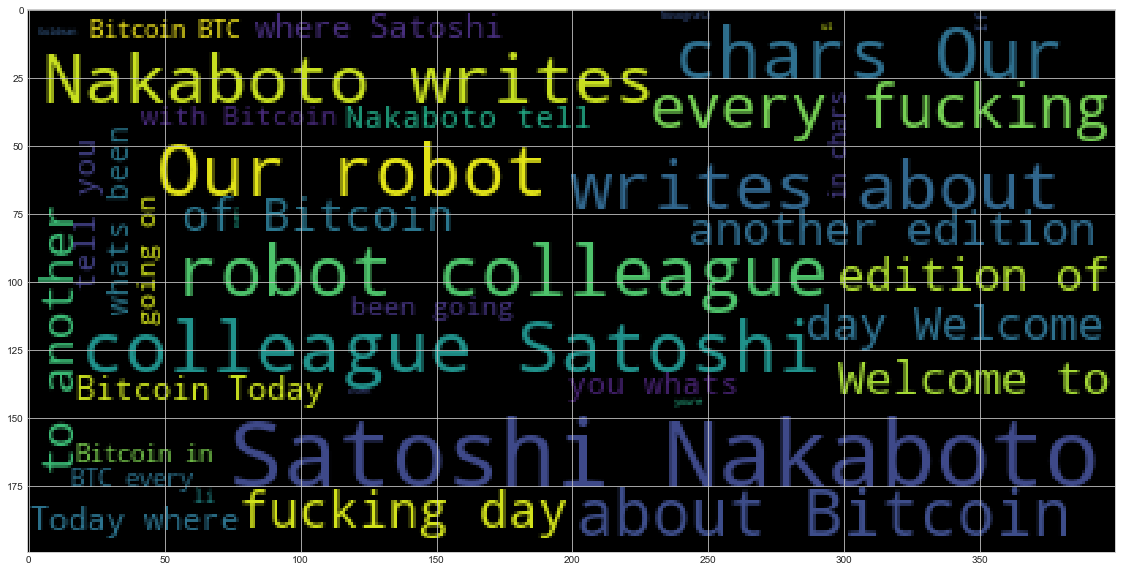

In [214]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(bitcoin_all)
plt.imshow(wc)

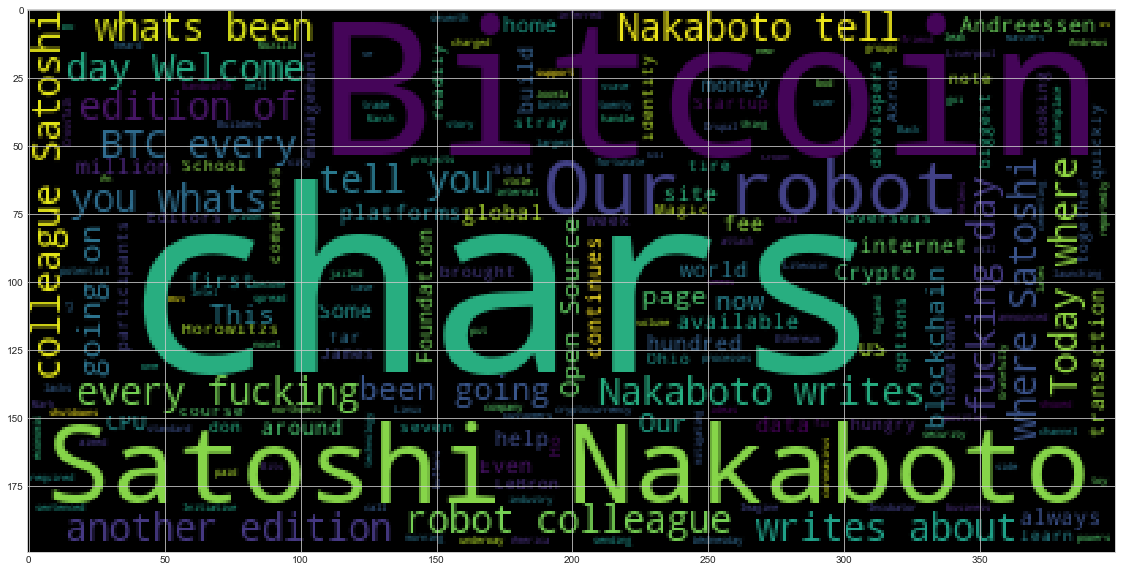

In [215]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(ethereum_all)
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [216]:
import spacy
from spacy import displacy

In [217]:
# Optional - download a language model for SpaCy
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [218]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [219]:
# Concatenate all of the bitcoin text together
bitcoin_all

'The Winklevoss twinsthe brothers Mark Zuckerberg allegedly stole the idea for Facebook fromare making a movie about themselves, Deadline reported this week. If that doesnt seem masturbatory enough, r… [+2657 chars]If youre planning to do some protesting and you dont want to risk your expensive smartphone in the processor you simply want to keep yourself as anonymous as possible while youre outconsider buying a… [+5568 chars]Reuters\r\n<ul><li>Goldman Sachs gave five reasons why it thinks bitcoin is "not an asset class" nor "a suitable investment" in a presentation Wednesday morning.</li><li>Goldman observed that the crypt… [+3412 chars]<ul><li>Famed investor Michael Novogratz tweeted on Monday that bitcoin will soon take out the $10,000 resistance level, telling his followers, "Get on the train."</li><li>Novogratz said that turmoil… [+2757 chars]Our robot colleague Satoshi Nakaboto writes about Bitcoin BTC every fucking day.\r\nWelcome to another edition of Bitcoin Today, where I, Sat

In [31]:
# Run the NER processor on all of the text

# Add a title to the document

In [221]:
# Render the visualization
doc = nlp(bitcoin_all)
displacy.render(doc, style='ent')

In [226]:
# List all Entities
print([(ent.text,ent.label_ ) for ent in doc.ents])

[('Mark Zuckerberg', 'PERSON'), ('Facebook', 'ORG'), ('Deadline', 'PERSON'), ('this week', 'DATE'), ('Goldman Sachs', 'ORG'), ('five', 'CARDINAL'), ('bitcoin', 'GPE'), ('Wednesday', 'DATE'), ('Goldman', 'ORG'), ('Michael Novogratz', 'PERSON'), ('Monday', 'DATE'), ('bitcoin', 'GPE'), ('$10,000 resistance', 'MONEY'), ('Novogratz', 'PERSON'), ('Satoshi Nakaboto', 'PERSON'), ('Bitcoin', 'GPE'), ('Bitcoin', 'GPE'), ('Today', 'DATE'), ('Satoshi Nakaboto', 'PERSON'), ('Bitcoin', 'GPE'), ('Satoshi Nakaboto', 'PERSON'), ('Bitcoin', 'GPE'), ('Bitcoin', 'GPE'), ('Today', 'DATE'), ('Satoshi Nakaboto', 'PERSON'), ('Bitcoin', 'GPE'), ('+3041', 'GPE'), ('2020', 'DATE'), ('a big year', 'DATE'), ('Bitcoin', 'GPE'), ('Bitcoin', 'PERSON'), ('Satoshi Nakaboto', 'PERSON'), ('Bitcoin', 'GPE'), ('Bitcoin', 'GPE'), ('Today', 'DATE'), ('Satoshi Nakaboto', 'PERSON'), ('Bitcoin', 'GPE'), ('Satoshi Nakaboto', 'PERSON'), ('Bitcoin', 'GPE'), ('Bitcoin', 'GPE'), ('Today', 'DATE'), ('Satoshi Nakaboto', 'PERSON'), ('B

---

## Ethereum NER

In [227]:
# Concatenate all of the bitcoin text together
ethereum_all

'Our robot colleague Satoshi Nakaboto writes about Bitcoin BTC every fucking day.\r\nWelcome to another edition of Bitcoin Today, where I, Satoshi Nakaboto, tell you whats been going on with Bitcoin in … [+3095 chars]Editors note:Andreessen Horowitzs Crypto Startup School brought together 45 participants from around the U.S. and overseas in a seven-week course to learn how to build crypto companies. Andreessen Ho… [+2503 chars]For developers looking to quickly build identity management into their platforms, the most readily available options don’t stray far from the internet’s biggest, most data-hungry platforms.\r\nMagic, a… [+2450 chars]Akron, Ohio, the hometown of LeBron James and the seat of the US tire industry; the one hundred and twenty seventh largest city in the US; and the home of America’s first toy company is now the lates… [+3647 chars]Some open-source groups, such as The Linux Foundation, can deal with it. Others aren\'t so fortunate. Some, such as Drupal Foundation, the 

In [35]:
# Run the NER processor on all of the text

# Add a title to the document

In [228]:
# Render the visualization
doc = nlp(ethereum_all)
displacy.render(doc, style='ent')

In [229]:
# List all Entities
print([(ent.text,ent.label_ ) for ent in doc.ents])

[('Satoshi Nakaboto', 'PERSON'), ('Bitcoin', 'GPE'), ('Bitcoin', 'GPE'), ('Today', 'DATE'), ('Satoshi Nakaboto', 'PERSON'), ('Bitcoin', 'GPE'), ('Andreessen Horowitzs Crypto Startup School', 'ORG'), ('45', 'CARDINAL'), ('U.S.', 'GPE'), ('seven-week', 'DATE'), ('Andreessen Ho', 'PERSON'), ('Ohio', 'GPE'), ('LeBron James', 'PERSON'), ('US', 'GPE'), ('the one hundred and twenty seventh', 'DATE'), ('US', 'GPE'), ('America', 'GPE'), ('first', 'ORDINAL'), ('The Linux Foundation', 'ORG'), ('Drupal Foundation', 'ORG'), ('OSI', 'ORG'), ('133', 'MONEY'), ('$2.5 million', 'MONEY'), ('$2.5 million', 'MONEY'), ('Wednesday', 'DATE'), ('morning', 'TIME'), ('March', 'DATE'), ('1500', 'CARDINAL'), ('well over a hundred', 'CARDINAL'), ('the Mozilla Builders Incubator', 'ORG'), ('more than £30,000', 'CARDINAL'), ('Bitcoin', 'GPE'), ('Litecoin and Ethereum', 'ORG'), ('Mark Andrews', 'PERSON'), ('St Helens', 'PERSON'), ('England', 'GPE'), ('Liverpool Crown C', 'ORG'), ('+2411', 'ORG'), ('CrossTalk', 'ORG')